In [1]:
%matplotlib inline
# notebook
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import networkx as nx
from math import sin, cos, sqrt, atan2, radians,log,log10
import json
from data import listedEiggHotels
from utils import *
from data import *
#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [38]:
def plotNumObservationsByYear(df):
    df = df["End date year"]
    df = list(df)
    df = Counter(df).items()
    df = sorted(df,key=lambda x: x[0])
    plt.plot([str(x[0]) for x in df],[x[1] for x in df])
    plt.xticks([str(c[0]) for c in df], rotation='vertical')
    plt.margins(0.01)
    plt.subplots_adjust(bottom=0.15)
    plt.show()

C:\Users\davie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: DtypeWarning: Columns (9,22) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


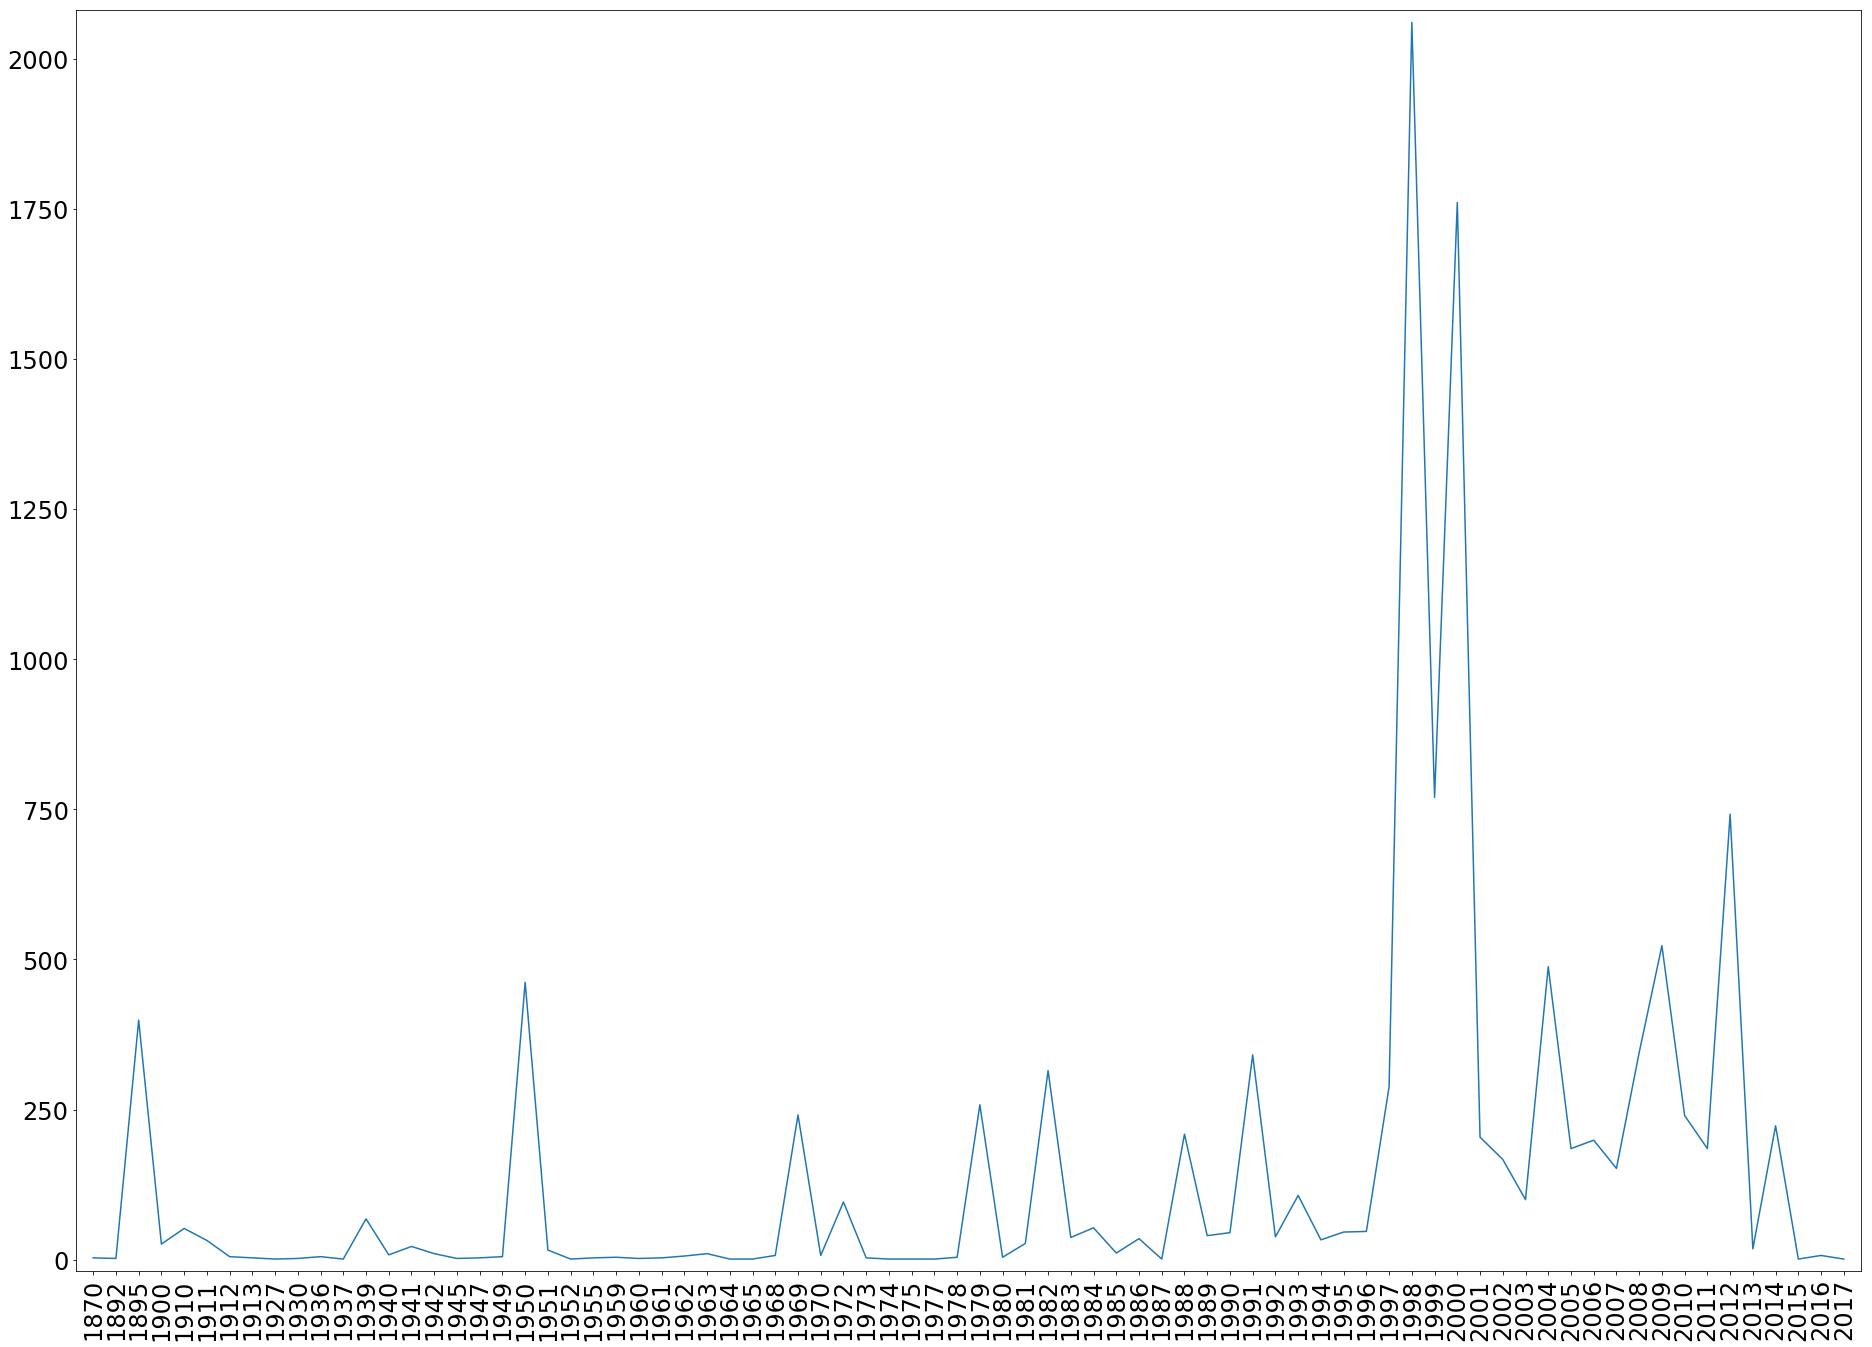

In [39]:
observationsOnEigg = eiggRawData()
plotNumObservationsByYear(observationsOnEigg)

C:\Users\davie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: DtypeWarning: Columns (55) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


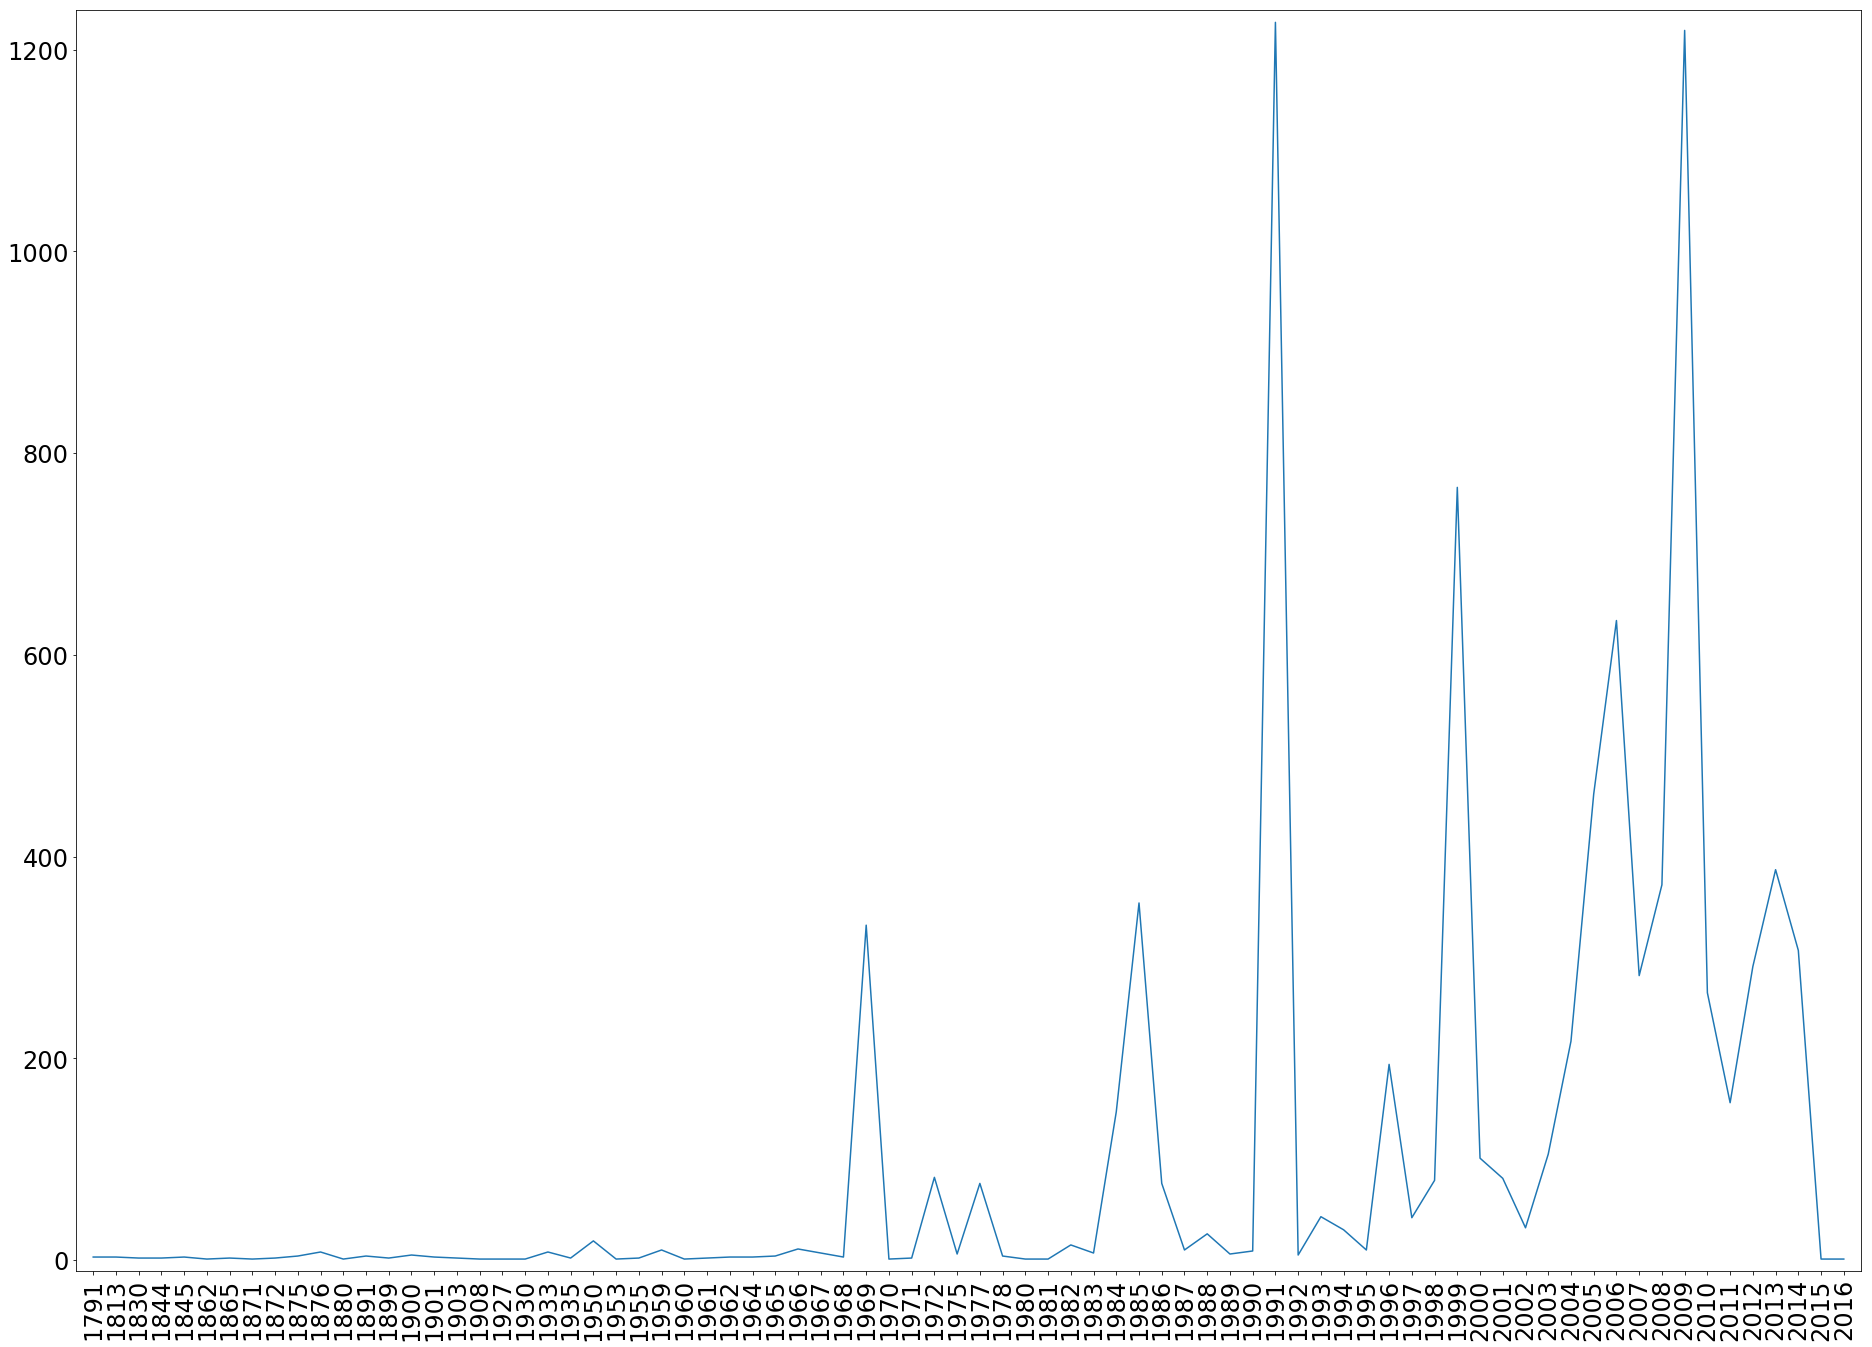

In [76]:
observationsOnSkye = skyeRawData()
plotNumObservationsByYear(observationsOnSkye)

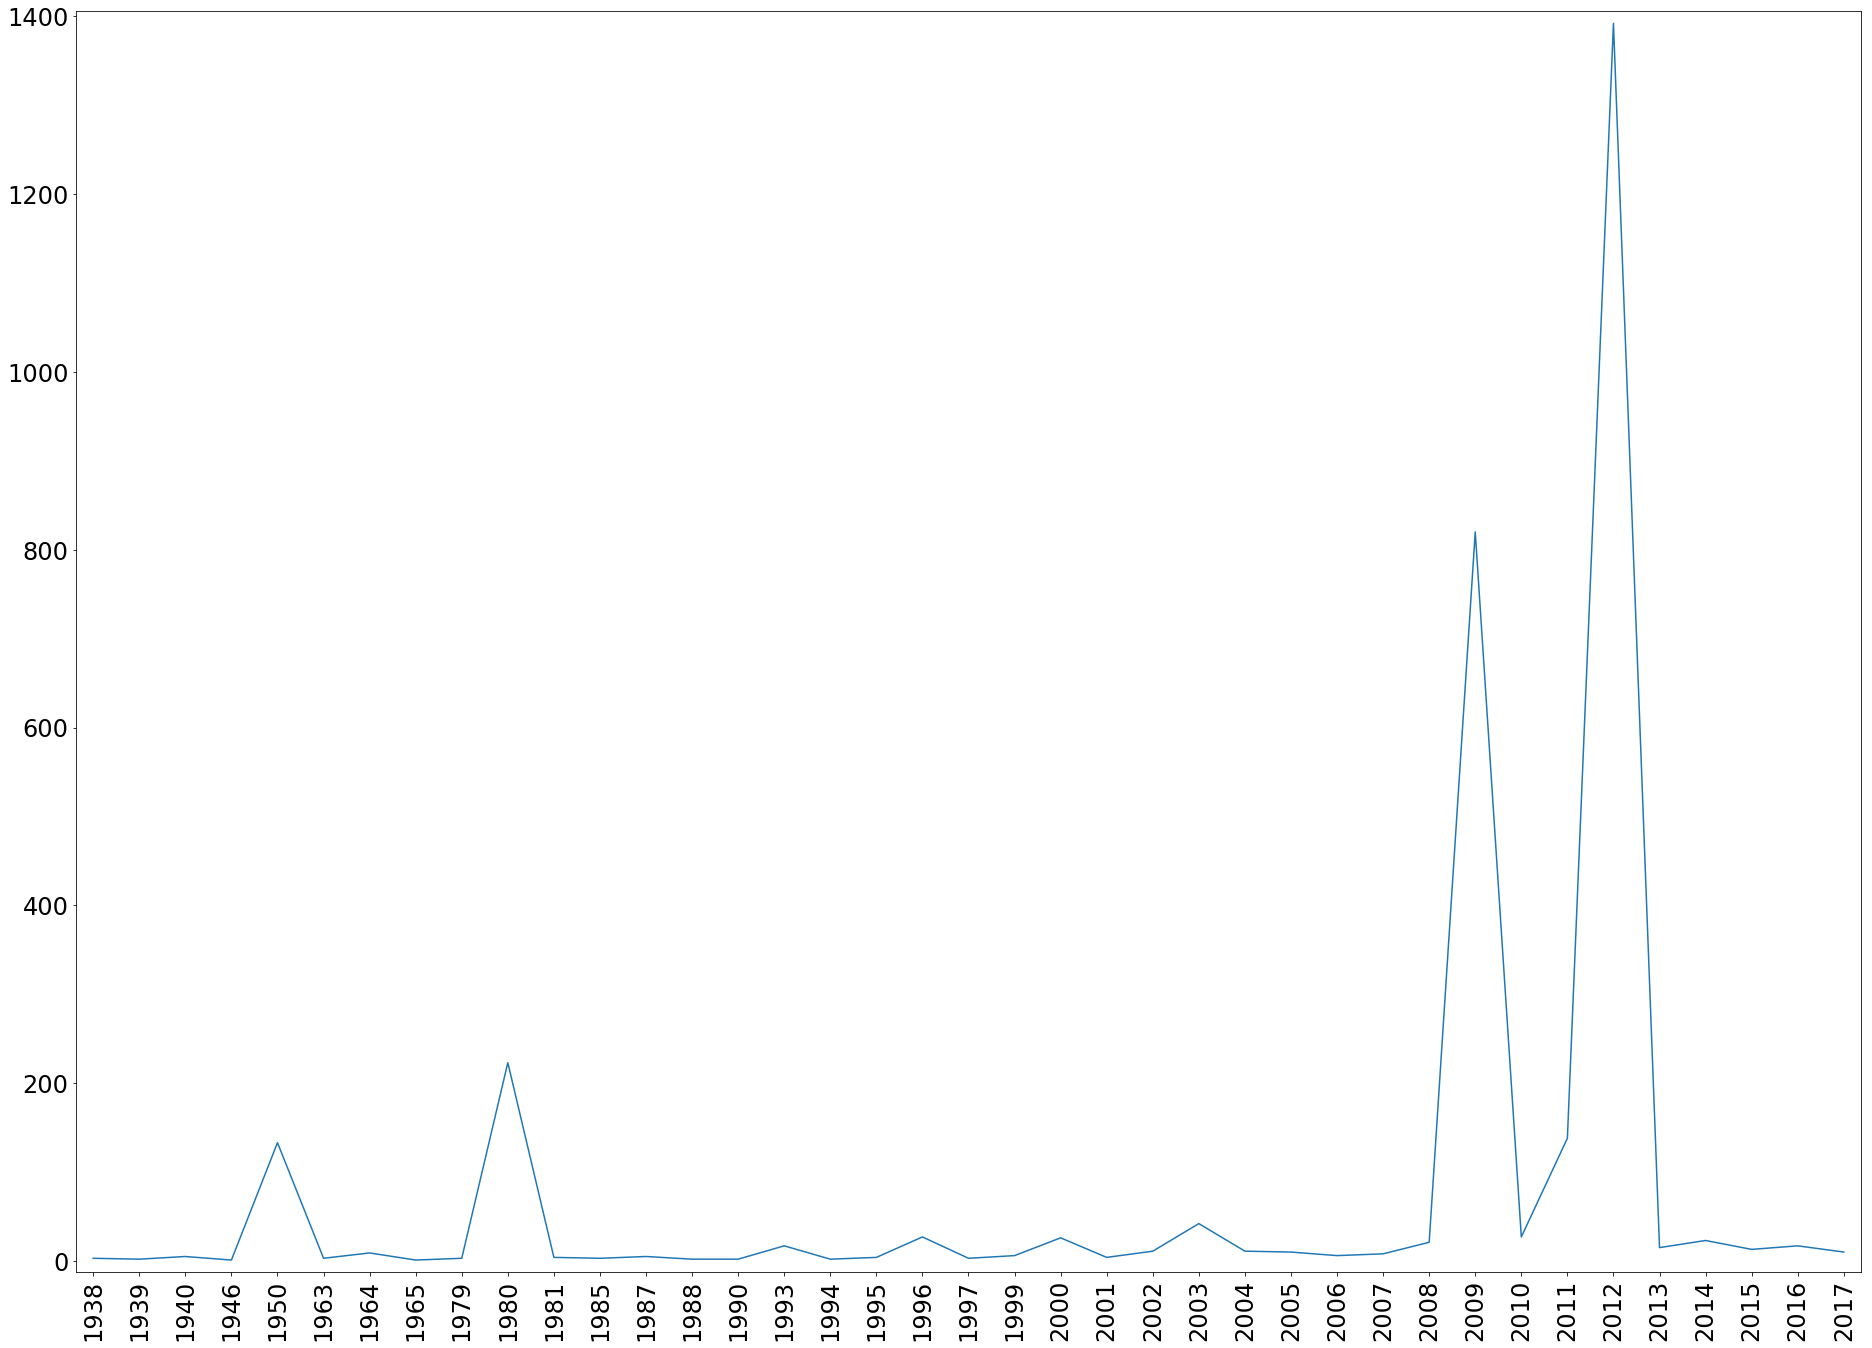

In [41]:
observationsOnMuck = muckRawData()
plotNumObservationsByYear(observationsOnMuck)

# Hypothesis: some kind of biological survey in 1997 as a result of the buyout is what gave Eigg so many biodiversity readings

### Stage 1: plot cumulative biodiversity (number of unique species)

In [73]:
def plotChart(xs,ys):
    plt.plot(xs,ys)
    plt.xticks(xs, rotation='vertical')
    plt.margins(0.01)
    plt.subplots_adjust(bottom=0.15)
    plt.show()
    
def getUniqueSpeciesUpToYear(df, year):
    df = df[df['End date year'] <= year]
    species = df['Scientific name']
    return len(Counter(species))

def getUniqueObserversUpToYear(df, year):
    df = df[df['End date year'] <= year]
    species = df['Recorder']
    return len(Counter(species))

def getUniqueAnimalsPerYear(df):
    return sorted([x[0] for x in list(Counter(df['End date year']).items())])

def plotCumulativeBiodiversity(df): # == number of total discovered species by year
    uniqueYears = getUniqueAnimalsPerYear(df)
    preBuyout = list(filter(lambda x: x < 1997, uniqueYears))
    print("Number of animals pre-buyout:")
    print([preBuyout[-1], getUniqueSpeciesUpToYear(df,preBuyout[-1])])
    print("-----------------------------")
    print("Post buyout there were:")
    print([uniqueYears[-1], getUniqueSpeciesUpToYear(df,uniqueYears[-1])])
    plottableData = [[str(year),getUniqueSpeciesUpToYear(df,year)] for year in uniqueYears]
    xs = [x[0] for x in plottableData]
    ys = [x[1] for x in plottableData]
    plotChart(xs,ys)
    
def plotCumulativeObservers(df): # == number of total discovered species by year
    uniqueYears = getUniqueAnimalsPerYear(df)
    preBuyout = list(filter(lambda x: x < 1997, uniqueYears))
    print("Number of animals pre-buyout:")
    print([preBuyout[-1], getUniqueObserversUpToYear(df,preBuyout[-1])])
    print("-----------------------------")
    print("Post buyout there were:")
    print([uniqueYears[-1], getUniqueObserversUpToYear(df,uniqueYears[-1])])
    plottableData = [[str(year),getUniqueObserversUpToYear(df,year)] for year in uniqueYears]
    xs = [x[0] for x in plottableData]
    ys = [x[1] for x in plottableData]
    plotChart(xs,ys)
    
def getUniqueAnimalsPerYearToPlotManually(df):
    uniqueYears = getUniqueAnimalsPerYear(df)
    plottableData = [[str(year),getUniqueSpeciesUpToYear(df,year)] for year in uniqueYears]
    xs = [x[0] for x in plottableData]
    ys = [x[1] for x in plottableData]
    return xs,ys

Number of animals pre-buyout:
[1996, 1341]
-----------------------------
Post buyout there were:
[2017, 2460]


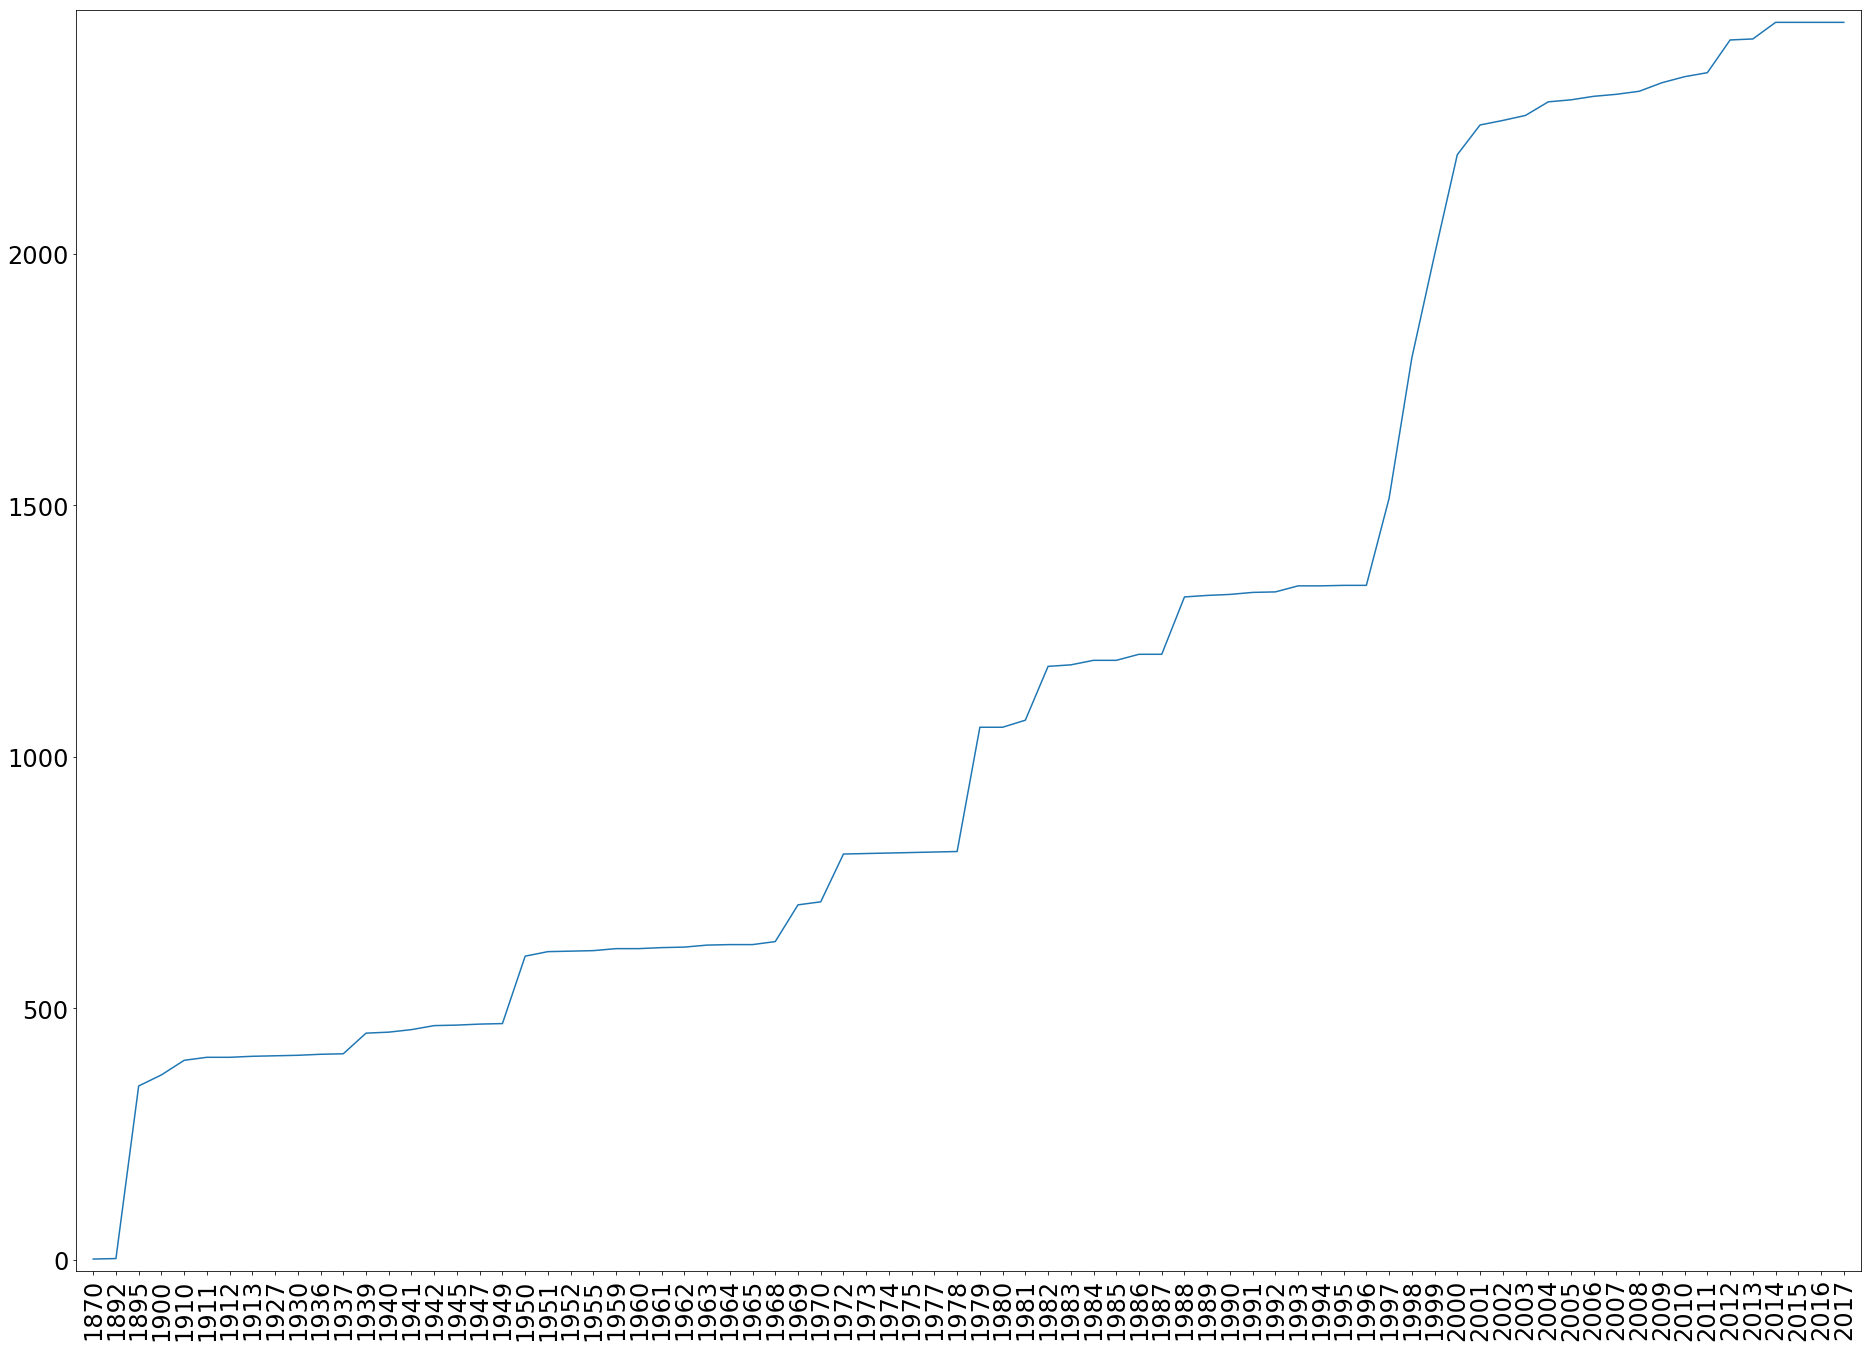

In [64]:
plotCumulativeBiodiversity(observationsOnEigg)

Number of animals pre-buyout:
[1996, 278]
-----------------------------
Post buyout there were:
[2017, 836]


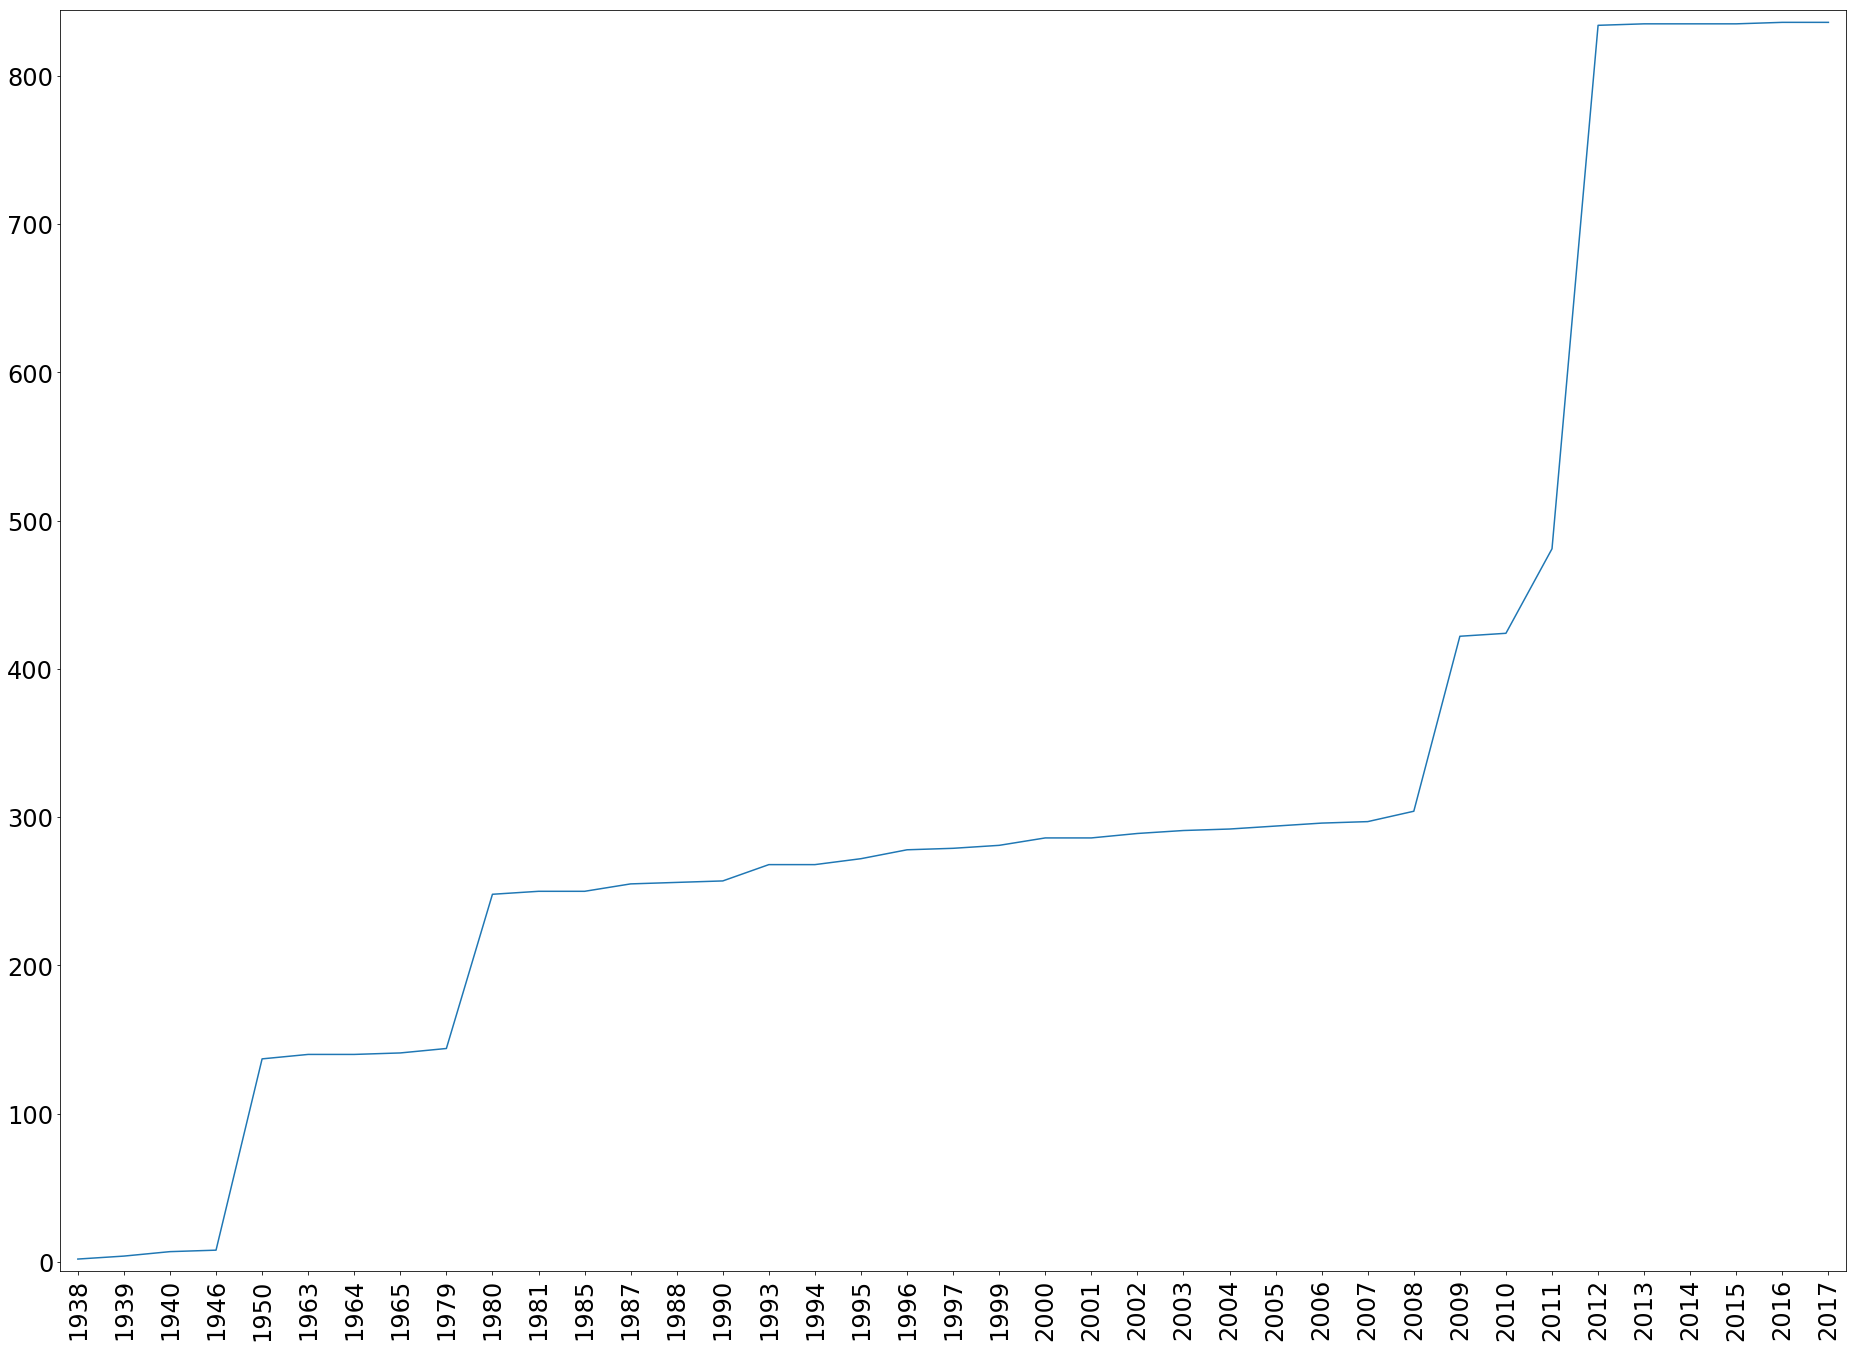

In [65]:
plotCumulativeBiodiversity(observationsOnMuck)

Number of animals pre-buyout:
[1996, 813]
-----------------------------
Post buyout there were:
[2016, 1397]


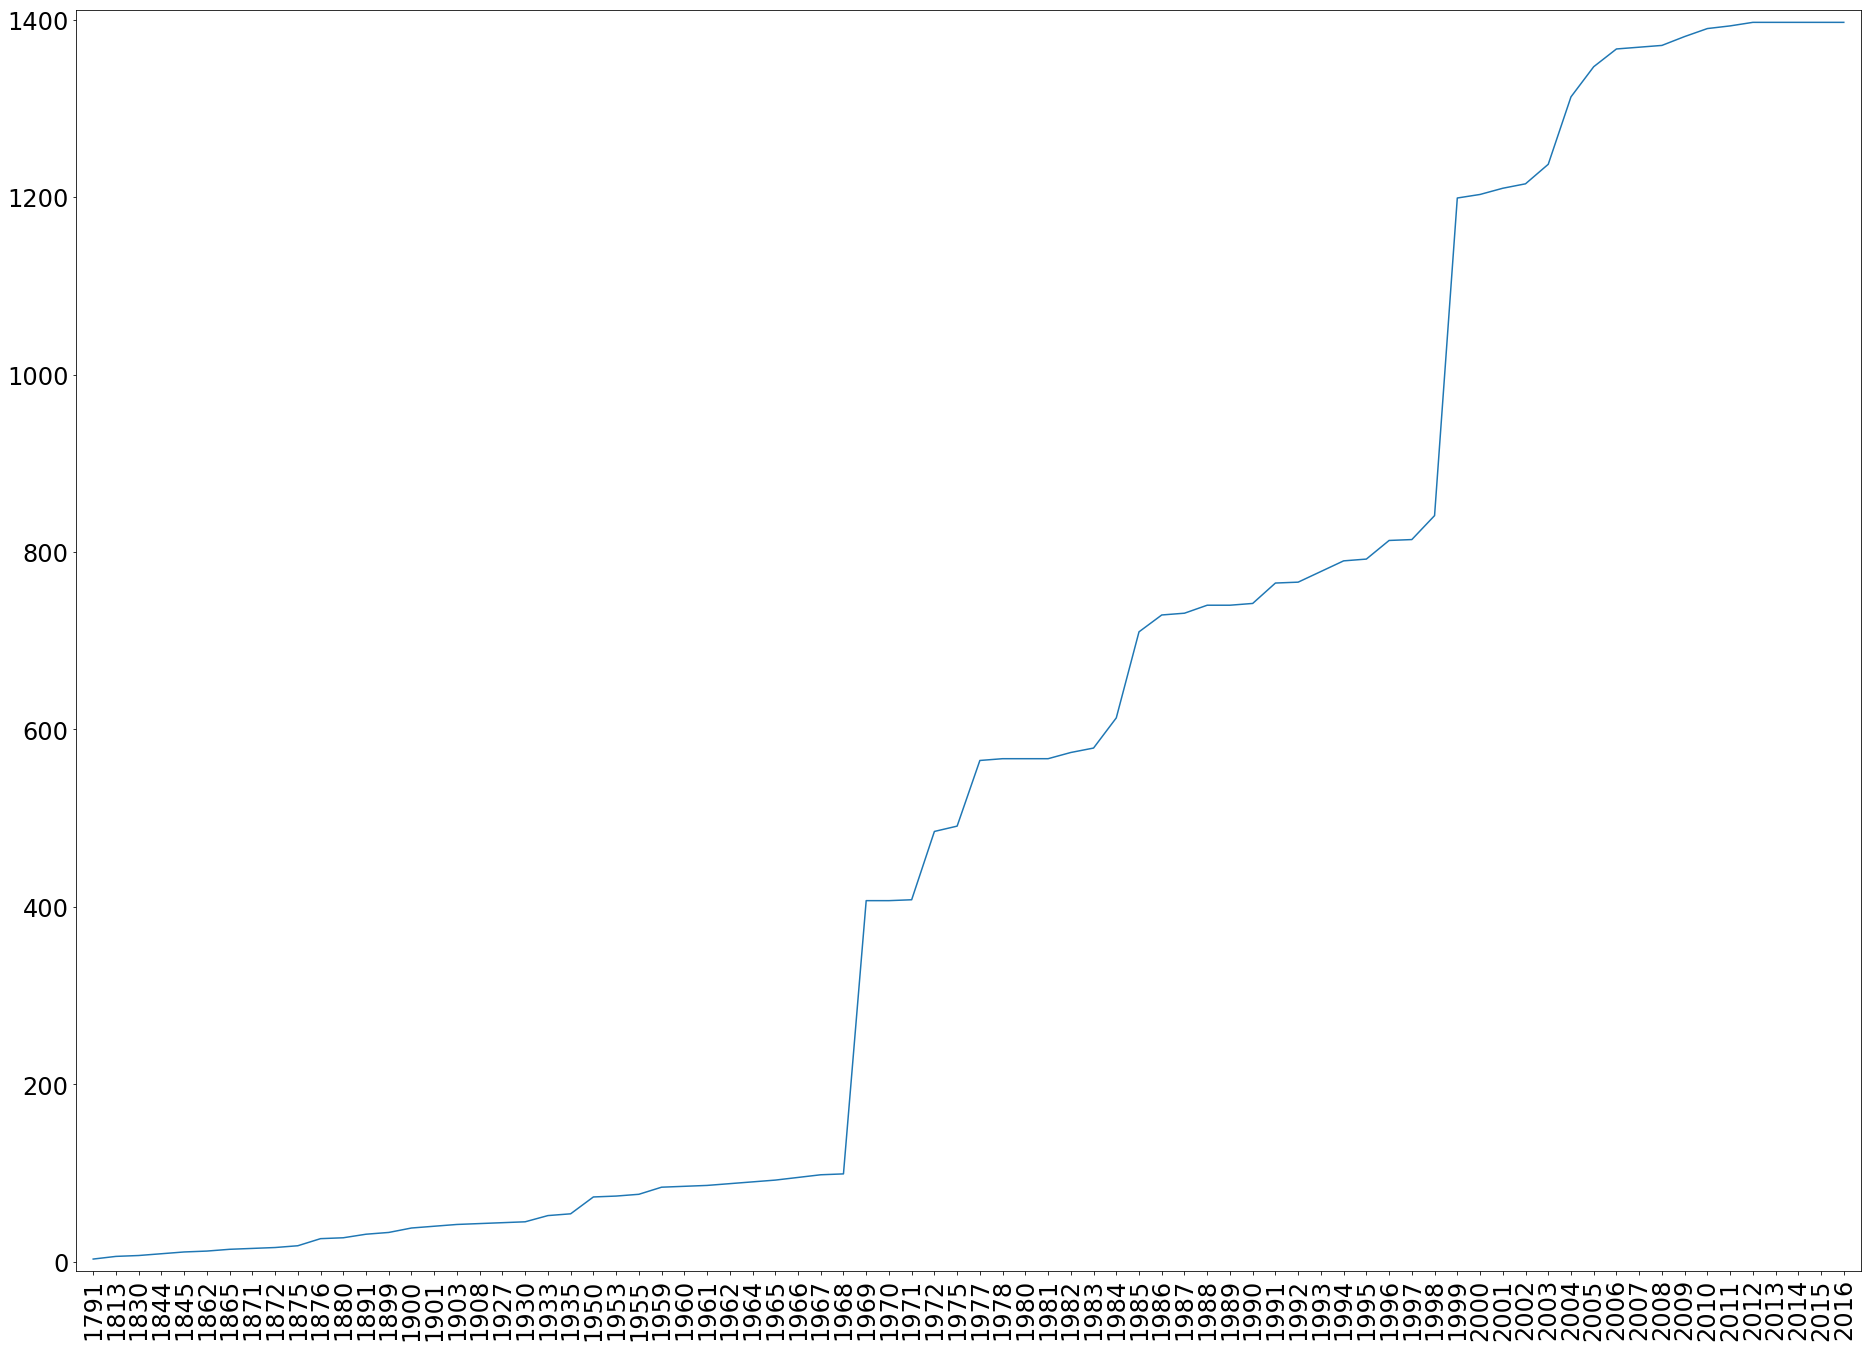

In [63]:
plotCumulativeBiodiversity(observationsOnSkye)

# Conclusions: both have a violent jump at 1997 (muck has it's own thing happening...)

Notice also that Eigg has always had higher numbers of samples

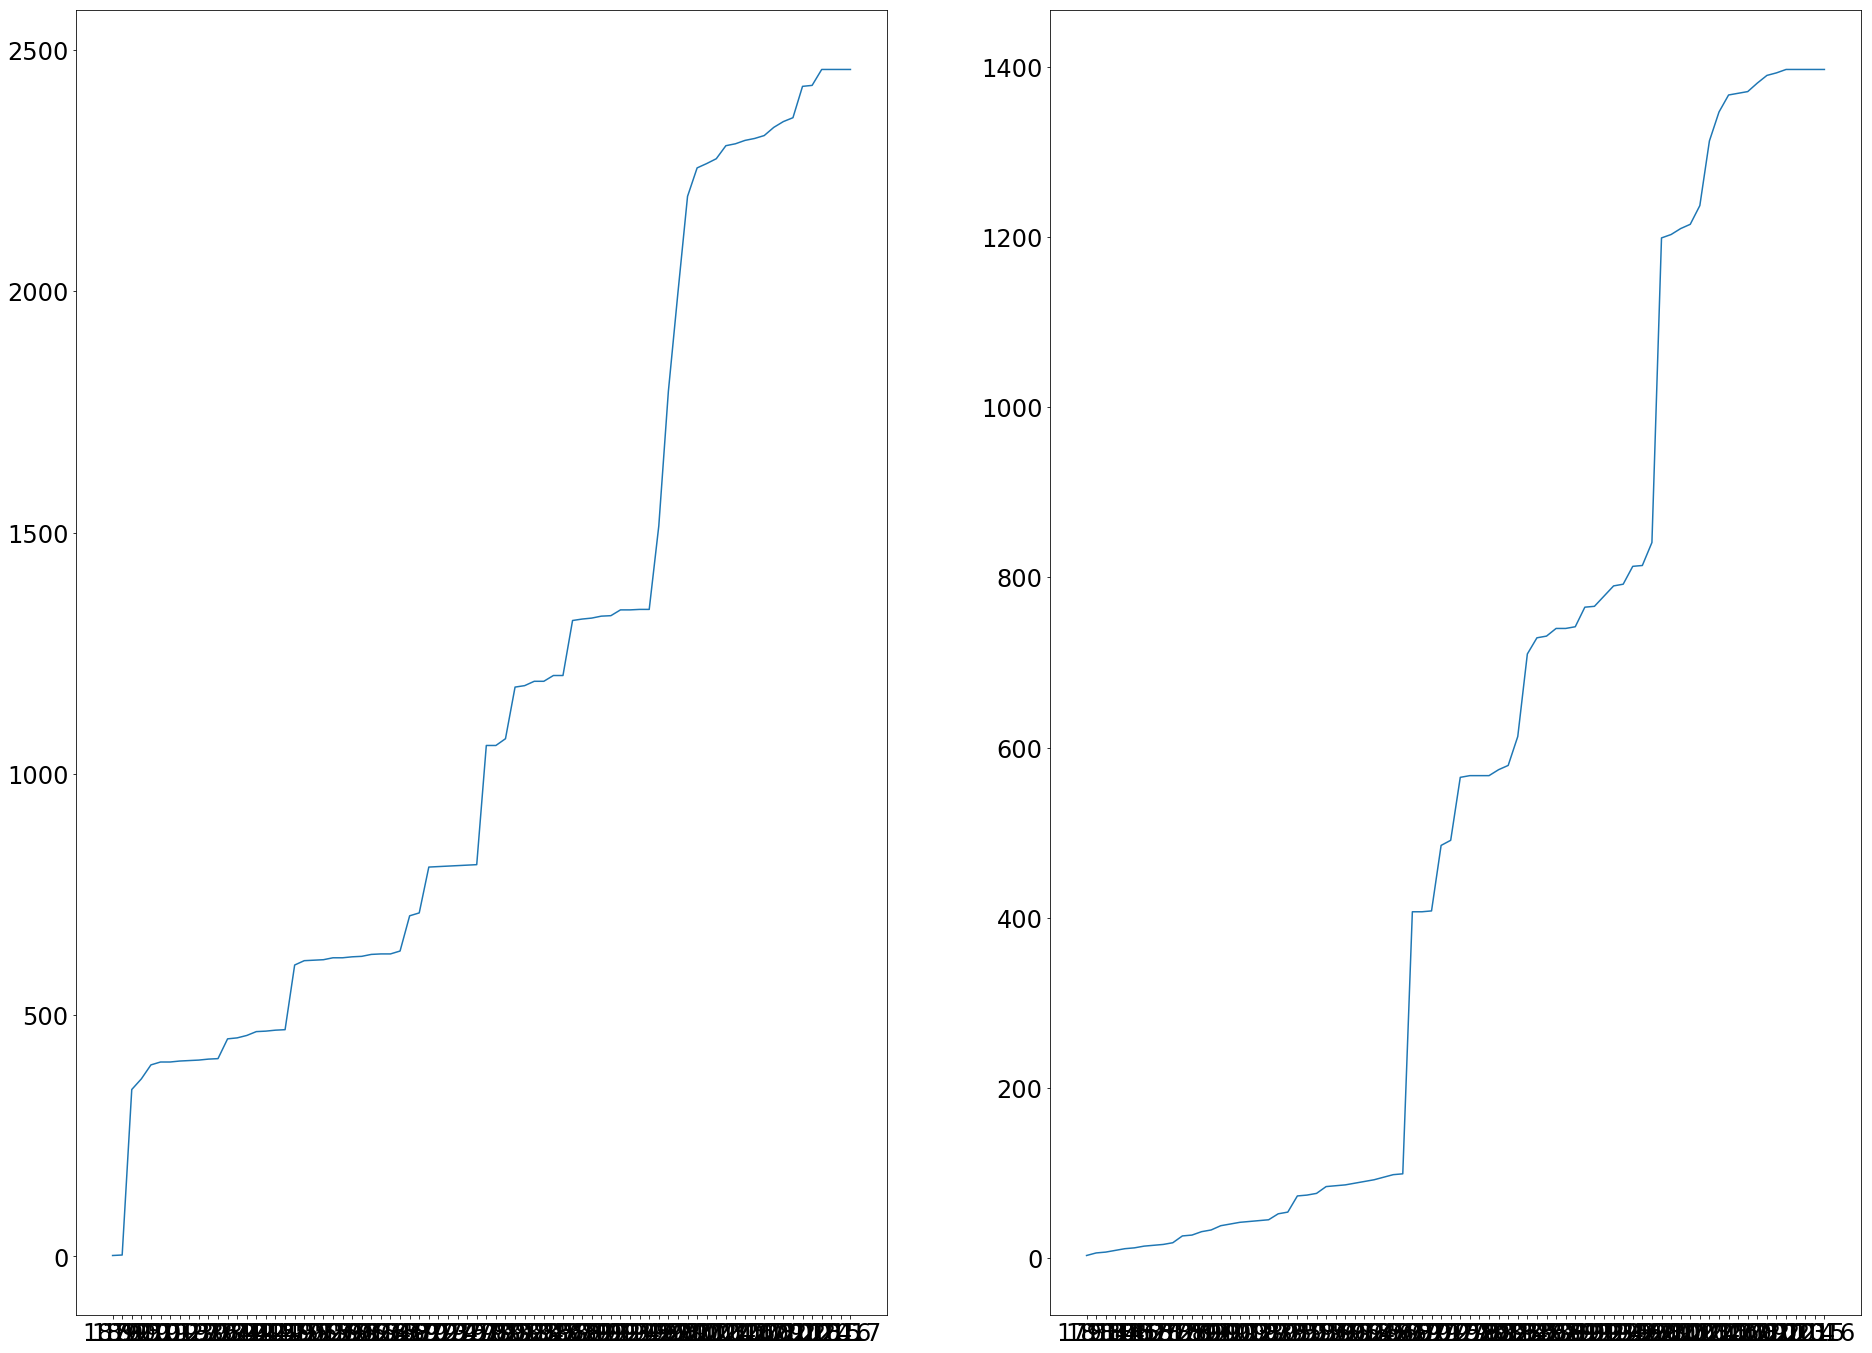

In [70]:
fig,(ax1,ax2) = plt.subplots(1,2)

eiggXS,eiggYS = getUniqueAnimalsPerYearToPlotManually(observationsOnEigg)
ax1.plot(eiggXS,eiggYS)

skyeXS,skyeYS = getUniqueAnimalsPerYearToPlotManually(observationsOnSkye)
ax2.plot(skyeXS,skyeYS)



So there is a huge jump at 1997- but this isn't necessarily because of the buyout. Eigg has always been popular for observations of Animals.

No information found online either. My theory is that change of ownership multiple times made it "Not just another part of Scotland" AND the proactive residents of Eigg

Number of animals pre-buyout:
[1996, 75]
-----------------------------
Post buyout there were:
[2017, 175]


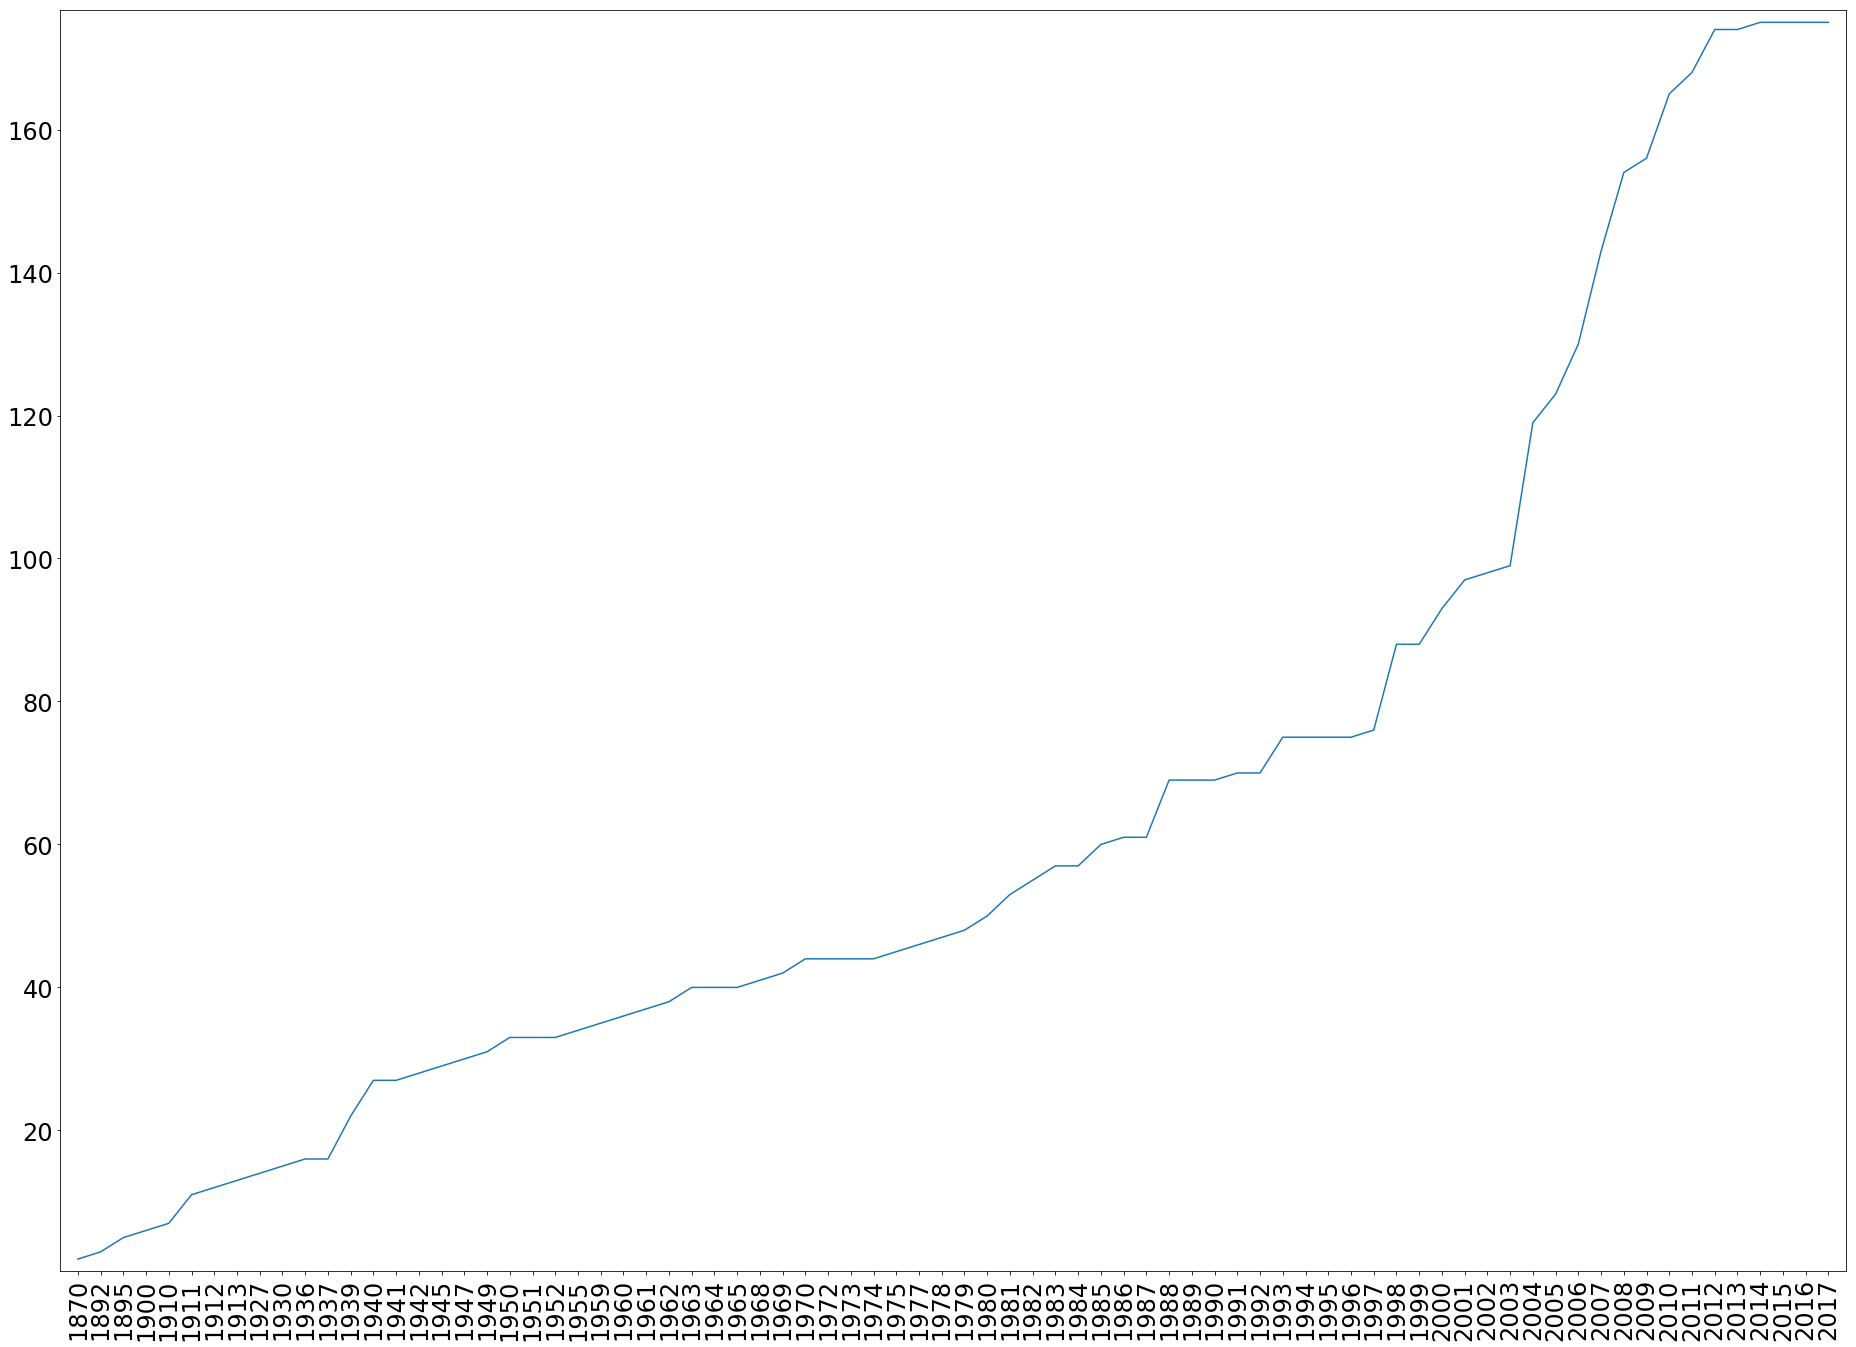

In [74]:
plotCumulativeObservers(observationsOnEigg)

Number of animals pre-buyout:
[1996, 57]
-----------------------------
Post buyout there were:
[2016, 91]


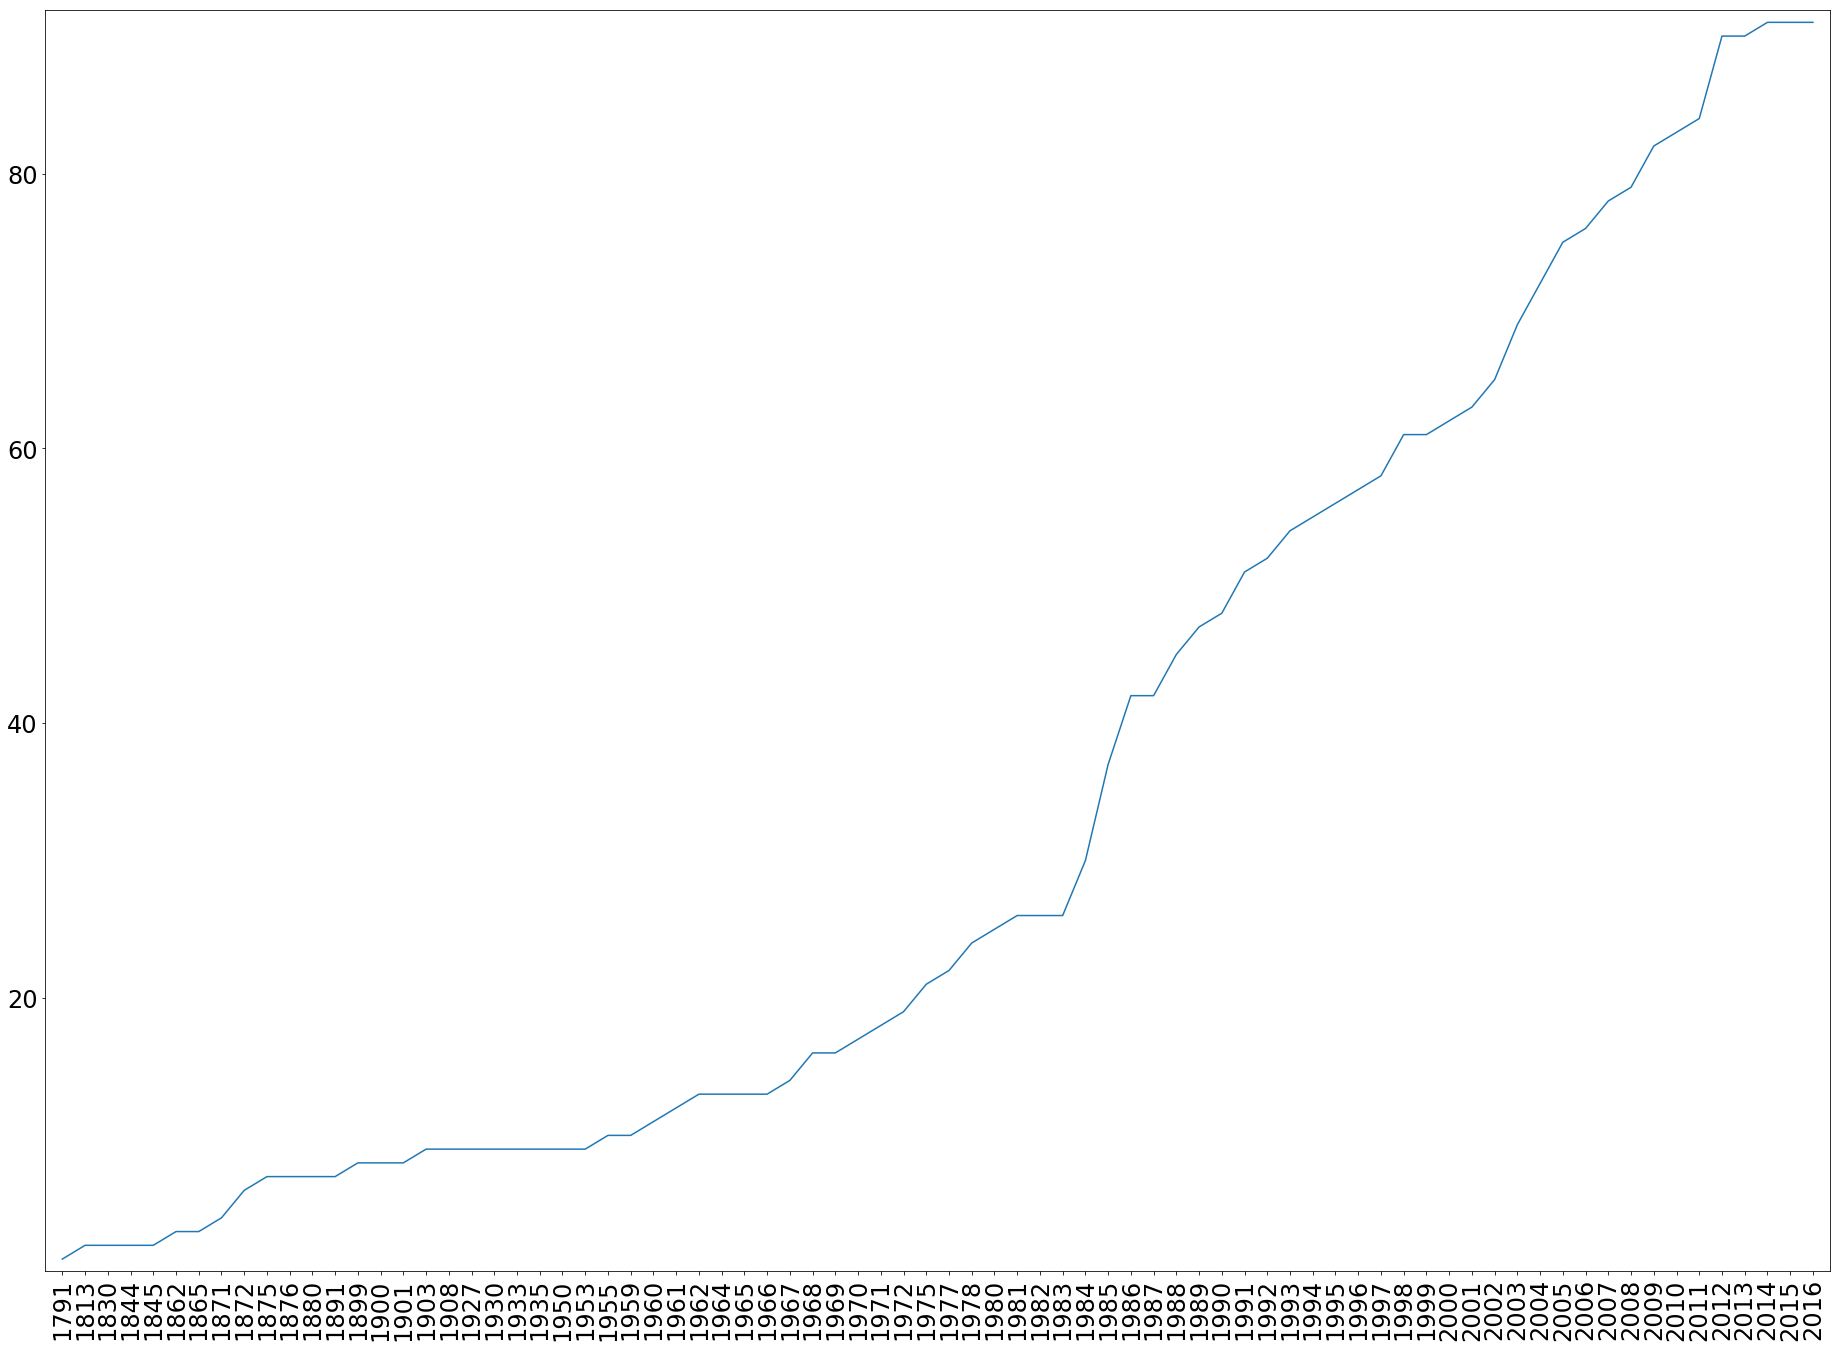

In [75]:
plotCumulativeObservers(observationsOnSkye)

# So observers are very much also more common on Eigg (loosely)

(e.g. Eigg has roughly always had double number the observers)